**DIỀN VÀO ...** NẾU BẠN THẤY CÂU **"WRITE YOUR CODE HERE"**

#Phân loại cảm xúc từ các bình luận sản phẩm



Hãy import các thư viện. Bạn nên cài **nltk** trước khi thực hiện lab này.

In [14]:
import sklearn, pandas
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#Đọc một số dữ liệu bình luận sản phẩm

Hãy load các bình luận cho một tập các sản phẩm dành cho trẻ sơ sinh. Tập dữ liệu này tên là **"amazon_baby.csv"**.

In [8]:
# WRITE YOUR CODE HERE
products = pd.read_csv('amazon_baby.csv', sep=',', encoding='utf-8', engine='python')

#Hãy cùng nhau khám phá dữ liệu này

Dữ liệu gồm tên sản phẩm, văn bản bình luận và xếp hạng của bình luận.

In [10]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


#Hãy xây dựng vectơ word count (đếm từ) cho từng bình luận

Nếu bạn không quen với nltk, hãy xem các hướng dẫn sau:

* [Xử Lý Ngôn Ngữ Tự Nhiên với Python và NLTK](https://viblo.asia/s/xu-ly-ngon-ngu-tu-nhien-voi-python-Je5Ejz9wKnL)

* [Xây Dựng Chatbot Bằng NLTK & Keras – Python Chatbot Project](https://ngoton.it/huong-dan-xay-dung-chatbot-bang-nltk-va-keras/)

* [Hướng dẫn NLP bằng Python NLTK (Ví dụ đơn giản)](https://www.datacamp.com/tutorial/text-analytics-beginners-nltk)


Chúng ta sẽ sử dụng thư viện **nltk** để tạo vectơ count.

In [15]:
#products['review'].dtype
from nltk.tokenize import word_tokenize


def word_count_function(string):
  """This function will return a dictionary
  where its key is the word from the string (input) and
  its value is the number of the appearance of this word in the string"""
  count = {}
  for word in word_tokenize(string.strip()):
    count[word] = count.get(word, 0) + 1

  # WRITE YOUR CODE HERE
  return count

# WRITE YOUR CODE HERE

# Tạo vectơ count cho các bình luận
products['word_count'] = products["review"].map(word_count_function, na_action="ignore")

In [16]:
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


Vẽ đồ thị các sản phẩm có nhiều bình luận nhất.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#products['name'].show()
#products['name'].dropna().apply(pandas.value_counts) #.plot(kind='bar')
from collections import Counter
product_counter = Counter(products['name'].dropna().values)
print(product_counter.most_common(5))

[('Vulli Sophie the Giraffe Teether', 785), ('Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L', 562), ('Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision', 561), ('Baby Einstein Take Along Tunes', 547), ('Cloud b Twilight Constellation Night Light, Turtle', 520)]


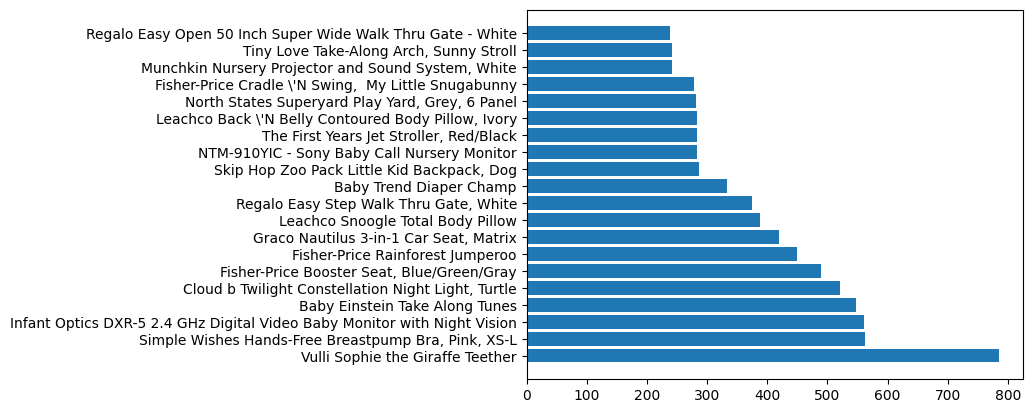

In [19]:
# Vẽ đồ thị các sản phẩm có nhiều bình luận nhất.
best_products_plotted = 20
products_plotted = product_counter.most_common(best_products_plotted)
counter_labels, counts = zip(*products_plotted)
counter_pos = np.arange(best_products_plotted)
plt.barh(counter_pos, counts)
plt.yticks(counter_pos, counter_labels)
plt.show()

#Kiểm tra các bình luận cho sản phẩm bán chạy nhất: 'Vulli Sophie the Giraffe Teether'

In [20]:
giraffe_reviews = products.loc[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [21]:
len(giraffe_reviews)

785

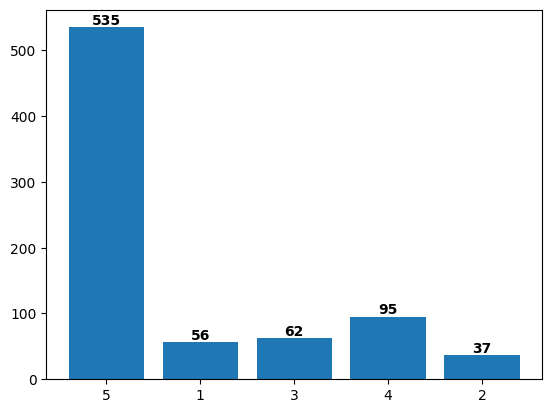

In [22]:
#giraffe_reviews['rating'].show(view='Categorical')
rating_counter = Counter(giraffe_reviews['rating'].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+4.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

#Xây dựng một bộ phân loại cảm xúc

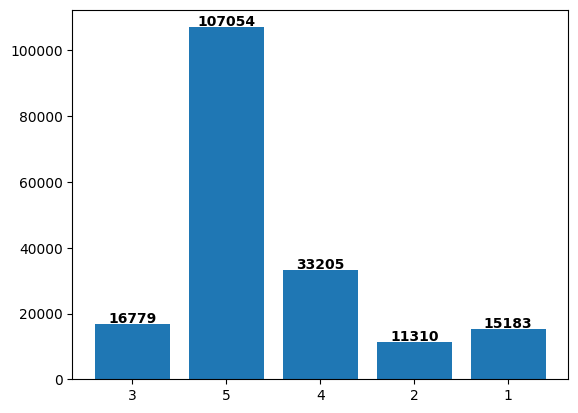

In [25]:
#products['rating'].show(view='Categorical')

# WRITE YOUR CODE HERE
# Xây dựng một vectơ rating count (số lượng mỗi rating)
rating_counter = Counter(products["rating"].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+500.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

##Xác định một câu là tích cực hay tiêu cực

Chúng ta sẽ bỏ qua tất cả các bình luận có rating = 3, vì chúng có xu hướng trung lập. Các bài bình luận có rating là 4 hoặc cao hơn sẽ được coi là tích cực, trong khi các bài bình luận từ 2 trở xuống là tiêu cực.

In [26]:
#bỏ qua các bình luận 3*

# WRITE YOUR CODE HERE
products = products.loc[products["rating"] != 3]

In [27]:
#tích cực = bình luận 4* hoặc 5*

# WRITE YOUR CODE HERE
products['sentiment'] = products["rating"].apply(lambda rating : 1 if rating > 3 else -1)

/tmp/ipython-input-2147854514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['sentiment'] = products["rating"].apply(lambda rating : 1 if rating > 3 else -1)


In [28]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",1


##Hãy huấn luyện bộ phân loại cảm xúc với LogisticRegression

In [29]:
# WRITE YOUR CODE HERE
# xây dựng mô hình LogisticRegression
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(products.dropna(subset=("review", "sentiment")), train_size=0.8, test_size=0.2, random_state=0)
#train_data,test_data = products.random_split(.8, seed=0)
print(len(train_data), len(test_data))

132780 33195


In [31]:
# tạo dữ liệu huấn luyện và kiểm tra
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize)
train_features = vectorizer.fit_transform(train_data['review'].values)
train_labels = train_data['sentiment'].astype(int).values
test_features = vectorizer.transform(test_data['review'].values)
test_labels = test_data['sentiment'].astype(int).values

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
# WRITE YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
sentiment_model = LogisticRegression(max_iter=1000).fit( train_features , train_labels)

#Đánh giá mô hình cảm xúc

In [33]:
print(sentiment_model.predict_proba(test_features[:2]))
print(sentiment_model.predict(test_features[:2]))

[[1.09473650e-04 9.99890526e-01]
 [9.99986822e-01 1.31780984e-05]]
[ 1 -1]


Model score: 0.9356529597830998
FPR/TPR amount: 3283 3283


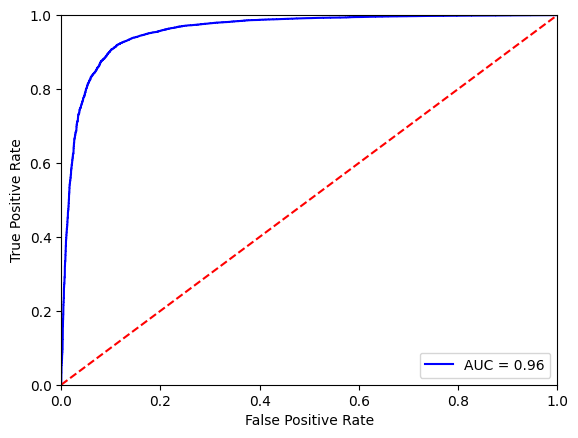

In [34]:
#sentiment_model.evaluate(test_data, metric='roc_curve')
from sklearn.metrics import roc_curve, roc_auc_score, auc
test_predictions = sentiment_model.predict_proba(test_features)[:, 1]
fpr, tpr, threshold = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)
print("Model score:", sentiment_model.score(test_features, test_labels))
print("FPR/TPR amount:", len(fpr), len(tpr))

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#sentiment_model.show(view='Evaluation')

#Áp dụng mô hình đã học để biết cảm xúc cho các bình luận về đồ chơi Giraffe

In [35]:
giraffe_reviews = giraffe_reviews.dropna(subset=['review'])
giraffe_reviews_features = vectorizer.transform(giraffe_reviews['review'].values)
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict_proba(giraffe_reviews_features)[:, 1]

In [36]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'He': 1, 'likes': 1, 'chewing': 1, 'on': 1, '...",0.998956
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'My': 1, 'son': 1, 'loves': 1, 'this': 1, 'to...",0.999746
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'There': 1, 'really': 1, 'should': 1, 'be': 1...",0.187512
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{'All': 1, 'the': 2, 'moms': 1, 'in': 1, 'my':...",0.977491
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'I': 4, 'was': 2, 'a': 1, 'little': 1, 'skept...",0.376632


##Sắp xếp các bình luận dựa trên cảm xúc đã dự đoán và khám phá

In [37]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

In [38]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,"{'Sophie': 17, ',': 8, 'oh': 1, 'your': 1, 'ti...",1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,"{'My': 1, 'Mom-in-Law': 1, 'bought': 1, 'Sophi...",1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,"{'As': 1, 'every': 1, 'mom': 1, 'knows': 1, ',...",1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,"{'Yes': 2, ',': 14, 'it\': 4, ''s': 6, 'import...",1.0
34746,Vulli Sophie the Giraffe Teether,Sophie the Giraffe is the perfect teething toy...,5,"{'Sophie': 5, 'the': 6, 'Giraffe': 1, 'is': 7,...",1.0


##Các bình luận tích cực nhất về đồ chơi giraffe

In [39]:
giraffe_reviews['review'].values[0]

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie\\'s Day, thus the name was born. Since that time millions of Sophie\\'s populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet\\'s attention. Sophie has happy little squeaks that bring squeals of delight fro

In [40]:
giraffe_reviews['review'].values[1]

'My Mom-in-Law bought Sophie for my son when he was just starting to really chew on things (and we were hearing some pretty scary things about toys not made in the USA). She did some research and came across Sophie and we are so glad that she did! While Sophie doesn\\\'t come from the USA, we love the fact that she is 100% safe and natural, and my son loves to play with her. I also love how soft Sophie is, my son tends to swing his toys around and when he\\\'s sitting on my lap I\\\'m usually in danger of being hit in the face with whatever he\\\'s holding, needless to say a soft toy is even better in my book! There\\\'s one last thing I want to comment on, I\\\'ve read reviews that said that Sophie was a "glorified dog toy" or something to that effect, and I don\\\'t want to seem rude, but I think they\\\'re crazy! Yes Sophie does squeak, (which my son didn\\\'t care about much at first but now he loves) but that\\\'s about as far as the comparison could go! If you want a quality teet

##Các bình luận tiêu cực nhất về đồ chơi giraffe

In [41]:
giraffe_reviews['review'].values[-1]

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

In [42]:
giraffe_reviews['review'].values[-2]

"I was so looking forward to getting this for my little girl, but from the second I opened the box I was disappointed.  It didn\\'t smell like vanilla rubber; it smelled like latex.  I don\\'t get HOW it can be called a teether.  It is a squeak toy.  Period.  It is completely hollow and has an obnoxious squeak when you barely even touch it.  It is so flexible that I don\\'t see how a- it can be safe (which reading some of the other negative reviews I now see that it probably isn\\'t safe) or b- can be effective.  This thing gives at the slightest touch, so how can it possibly aid in cutting teeth or massaging the gums?Additionally, you cannot sterilize this toy.  So... let\\'s see.  My baby got thrush when she was only 2 weeks old and I had to sterilize everything that came in contact with her mouth.  What would I have done with this then?  And she just got over her first cold, so again everything was sterilized.  You need to sterilize things with a baby- you just do.  How can this be 